<a href="https://colab.research.google.com/github/eugeniahorovenko/Portfolio_Projects/blob/main/Portfolio_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Підключення до бази даних data-analytics-mate

In [ ]:
# Встановлюю необхідні бібліотеки
!pip install --upgrade google-cloud-bigquery


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.29.0
    Uninstalling google-cloud-bigquery-3.29.0:
      Successfully uninstalled google-cloud-bigquery-3.29.0


In [ ]:
# Імпортую необхідні модулі
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
from scipy.stats import normaltest
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from itertools import combinations
import statsmodels.api as sm

In [ ]:
# проходжу аутентифікацію
auth.authenticate_user()

In [ ]:
# Створюю клієнта BigQuery
client = bigquery.Client(project="data-analytics-mate")


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


###SQL-запит


In [ ]:
query = """SELECT
s.date,
s.ga_session_id as session_id,
sp.continent,
sp.country,
sp.device,
sp.browser,
sp.mobile_model_name,
sp.operating_system,
sp.language,
sp.name as traffic_name,
sp.channel as traffic_channel,
ac.id AS account_id,
ac.is_unsubscribed,
ac.is_verified,
p.category as product_category,
p.name as product_name,
p.price,
p.short_description
FROM `data-analytics-mate.DA.order` o
join `data-analytics-mate.DA.session` s
on o.ga_session_id = s.ga_session_id
join `data-analytics-mate.DA.product` p
on o.item_id = p.item_id
join `data-analytics-mate.DA.session_params` sp
on s.ga_session_id = sp.ga_session_id
left join `DA.account_session` as acs
on sp.ga_session_id = acs.ga_session_id
left join `DA.account` as ac
on acs.account_id = ac.id
"""


In [ ]:
query_job = client.query(query)  # Виконання SQL-запиту
results = query_job.result()  # Очікування завершення запиту


In [ ]:
# Перетворення результатів у DataFrame
df = results.to_dataframe()

In [ ]:
df.head()

,date,session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_name,traffic_channel,account_id,is_unsubscribed,is_verified,product_category,product_name,price,short_description
0,2020-12-24,5726438444,(not set),(not set),desktop,Chrome,Chrome,Web,None,(referral),Paid Search,<NA>,<NA>,<NA>,Cabinets & cupboards,LIXHULT,356.0,"Wall-mounted cabinet combination, 50x25x50 cm"
1,2020-12-13,5614986004,(not set),(not set),desktop,<Other>,<Other>,Web,en-ca,(organic),Organic Search,<NA>,<NA>,<NA>,Tables & desks,BEKANT,1325.0,"Desk, 140x60 cm"
2,2020-11-05,8542454082,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Chairs,ANTILOP,20.0,Cover
3,2020-12-16,1717992506,(not set),(not set),mobile,Safari,iPhone,Web,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Beds,SUNDVIK,849.0,"Ext bed frame with slatted bed base, 80x200 cm"
4,2021-01-16,8416141289,(not set),(not set),desktop,Chrome,Safari,Web,en-gb,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,ALGOT,130.0,"Wall upright/drying rack, 66x41x197 cm"


In [ ]:
# зберігаю отримані дані
from google.colab import files
df.to_excel('sales_data_final.xlsx', index=False)
files.download('sales_data_final.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Короткий опис отриманого датасету



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               33538 non-null  dbdate 
 1   session_id         33538 non-null  Int64  
 2   continent          33538 non-null  object 
 3   country            33538 non-null  object 
 4   device             33538 non-null  object 
 5   browser            33538 non-null  object 
 6   mobile_model_name  33538 non-null  object 
 7   operating_system   33538 non-null  object 
 8   language           22531 non-null  object 
 9   traffic_name       33538 non-null  object 
 10  traffic_channel    33538 non-null  object 
 11  account_id         2781 non-null   Int64  
 12  is_unsubscribed    2781 non-null   Int64  
 13  is_verified        2781 non-null   Int64  
 14  product_category   33538 non-null  object 
 15  product_name       33538 non-null  object 
 16  price              335

######Додаткові розрахунки

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df["session_id"].nunique()

33538

In [ ]:
df["date"].max()

Timestamp('2021-01-27 00:00:00')

In [ ]:
df["date"].min()

Timestamp('2020-11-01 00:00:00')

####Опис:

***загальна кількість колонок:*** **18**

***кількість колонок числового типу*** (та які саме): **5**
*   session_id
*   account_id
*   is_unsubscribed
*   is_verified
*   price

***кількість колонок категоріального типу*** (та які саме): **12**

*   continent
*   country
*   device
*   browser
*   mobile_model_name
*   operating_system
*   traffic_name          
*   traffic_channel
*   product_category
*   product_name
*   short_description

***кількість колонок типу datetime:*** **1**

**кількість унікальних сесій:** **33538**

***який період часу розглядається (від… до…):***  від 01.11.2020 до 27.01.2021

***чи є пропущені значення:*** пропущені значення в стовпцях "language",        "account_id", "is_unsubscribed" та "is_verified"

***в яких колонках більше пропущених значень, яка причина:*** найбільше пропущених значень в колонках з таблиці **"account"**: "account_id", "is_unsubscribed" та "is_verified" це повязано із тим, що багато користувачів робили замовлення без створення акаунту.


#Основні показники діяльності компанії

In [ ]:
df.head()

,date,session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_name,traffic_channel,account_id,is_unsubscribed,is_verified,product_category,product_name,price,short_description
0,2020-12-24,5726438444,(not set),(not set),desktop,Chrome,Chrome,Web,None,(referral),Paid Search,<NA>,<NA>,<NA>,Cabinets & cupboards,LIXHULT,356.0,"Wall-mounted cabinet combination, 50x25x50 cm"
1,2020-12-13,5614986004,(not set),(not set),desktop,<Other>,<Other>,Web,en-ca,(organic),Organic Search,<NA>,<NA>,<NA>,Tables & desks,BEKANT,1325.0,"Desk, 140x60 cm"
2,2020-11-05,8542454082,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Chairs,ANTILOP,20.0,Cover
3,2020-12-16,1717992506,(not set),(not set),mobile,Safari,iPhone,Web,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Beds,SUNDVIK,849.0,"Ext bed frame with slatted bed base, 80x200 cm"
4,2021-01-16,8416141289,(not set),(not set),desktop,Chrome,Safari,Web,en-gb,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,ALGOT,130.0,"Wall upright/drying rack, 66x41x197 cm"


In [ ]:
# континенти (топ-3) за виручкою
top_continent_sales = df.groupby('continent')['price'].sum().sort_values(ascending=False).reset_index()
top_continent_sales.head(3)

,continent,price
0,Americas,17665280.0
1,Asia,7601298.3
2,Europe,5934624.2


In [ ]:
# топ 5 країн за виручкою
top_countries_sales = df.groupby('country')['price'].sum().sort_values(ascending=False).reset_index()
top_countries_sales.head(5)

,country,price
0,United States,13943553.9
1,India,2809762.0
2,Canada,2437921.0
3,United Kingdom,938317.9
4,France,710692.8


In [ ]:
# топ континенти за кількістю продажів
top_continent_orders = df.groupby('continent')['session_id'].count().sort_values(ascending=False).reset_index()
top_continent_orders.head(3)

,continent,session_id
0,Americas,18553
1,Asia,7950
2,Europe,6261


In [ ]:
# топ країни за кількістю продажів
top_countries_orders = df.groupby('country')['session_id'].count().sort_values(ascending=False).reset_index()
top_countries_orders.head(5)

,country,session_id
0,United States,14673
1,India,3029
2,Canada,2560
3,United Kingdom,1029
4,France,678


Найбільші продажі та доходи компанії у таких континентах, як Америки, Азія та Європа. Топ країни за продажами та кількістю замовлень: Америка, Індія, Канада, Британія та Франція.

In [ ]:
# топ-10 категорій товарів за загальною сумою продажів
top_category_sales = df.groupby('product_category')['price'].sum().sort_values(ascending=False).reset_index()
top_category_sales.head(10)

,product_category,price
0,Sofas & armchairs,8388254.5
1,Chairs,6147748.8
2,Beds,4919725.0
3,Bookcases & shelving units,3640818.1
4,Cabinets & cupboards,2336499.5
5,Outdoor furniture,2142222.2
6,Tables & desks,1790307.5
7,Chests of drawers & drawer units,906562.5
8,Bar furniture,735503.0
9,Children's furniture,467697.0


In [ ]:
# топ-10 категорій товарів у країні з найбільшими продажами
top_category_sales_usa = df[df['country'] == 'United States'].groupby('product_category')['price'].sum().sort_values(ascending=False).reset_index()
top_category_sales_usa.head(10)

,product_category,price
0,Sofas & armchairs,3707144.5
1,Chairs,2619773.8
2,Beds,2213058.0
3,Bookcases & shelving units,1567606.9
4,Cabinets & cupboards,994545.5
5,Outdoor furniture,929245.2
6,Tables & desks,777865.0
7,Chests of drawers & drawer units,382388.0
8,Bar furniture,330805.0
9,Children's furniture,207575.0


Топ 10 категорій товарів в цілому по Компанії та в країні з найбільшими продажами (Америці) не відрізняються.

In [ ]:
# продажі у розрізі типів девайсів
top_device_sales = df.groupby('device')['price'].sum().sort_values(ascending=False)
top_device_sales


,price
device,
desktop,18864039.0
mobile,12384225.8
tablet,723466.3


In [ ]:
# продажі у розрізі моделей девайсів
top_model_sales = df.groupby('mobile_model_name')['price'].sum().sort_values(ascending=False)
top_model_sales

,price
mobile_model_name,
Chrome,8899523.9
<Other>,6535330.8
Safari,6491062.1
iPhone,6420776.3
ChromeBook,1830458.7
Edge,697222.3
iPad,448854.2
Firefox,421066.9
Pixel 4 XL,118287.7


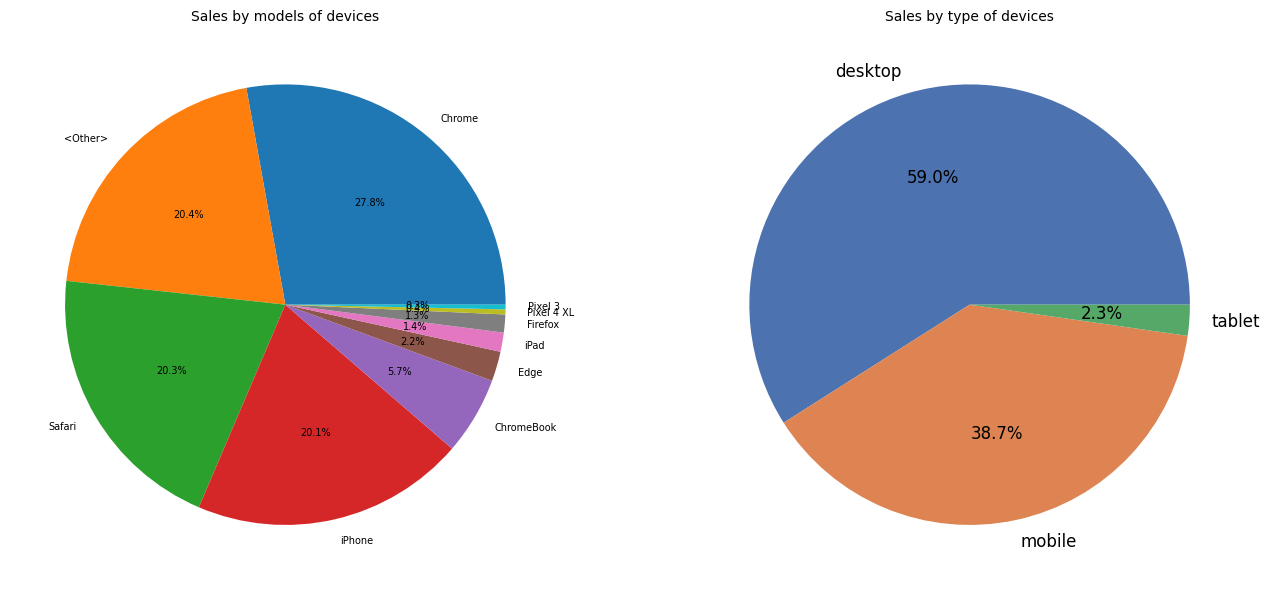

In [ ]:
# продажі у розрізі типів та моделей девайсів (у % від загальних продажів)
# створюю графік
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Задаю палітру кольорів
palette = sns.color_palette("deep", len(df))

# Перший pie chart
top_model_sales.plot(kind='pie', autopct='%1.1f%%', labels=top_model_sales.index, color=palette, textprops={'fontsize': 7}, ax=axes[0])

axes[0].set_title("Sales by models of devices", fontsize=10)
axes[0].set_ylabel('')

# Другий pie chart
top_device_sales.plot(kind='pie', autopct='%1.1f%%', labels=top_device_sales.index, colors=palette,  textprops={'fontsize': 12}, ax=axes[1])
axes[1].set_title("Sales by type of devices", fontsize=10)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


Найбільші продажі на декстопі (59%) та мобільній версії (38,7%). При цьому серед моделей девайсів найблішу частку займають Chrome(27,8%), інші (20,4%), Safari(20,3) та Айфон (20,1%)

In [ ]:
# продажі за джерелами трафіку (у % від загальних продажів)
top_traffic_sales = df.groupby('traffic_channel')['price'].sum().sort_values(ascending=False).reset_index()
top_traffic_sales["percent_of_total"] = top_traffic_sales["price"] / top_traffic_sales["price"].sum() *100
top_traffic_sales

,traffic_channel,price,percent_of_total
0,Organic Search,11433151.6,35.760189
1,Paid Search,8511049.4,26.620546
2,Direct,7494923.4,23.442345
3,Social Search,2532105.7,7.919827
4,Undefined,2000501.0,6.257093


За джерелами трафіку найбільші продажі на Organic та Paid Search 35,76% та 26,62% відповідно, Direct на третьому місці із 23,44% від загальних продажів.

In [ ]:
# відсоток зареєстрованих користувачів, які підтвердили свою електронну адресу
registered_users = df['account_id'].notnull().count()
verified_users = df['is_verified'].sum()
registered_verified_users = verified_users / registered_users * 100
registered_verified_users

np.float64(5.930586200727532)

In [ ]:
# відсоток зареєстрованих користувачів, які відписалися від розсилки
unsubscribed_users = df['is_unsubscribed'].sum()
registered_unsubscribed_users = unsubscribed_users / registered_users * 100
registered_unsubscribed_users

np.float64(1.332816506649174)

In [ ]:
# поведінка (у плані продажів) тих, хто відписався від розсилки та тих, хто досі підписаний
top_subscribed_sales = df.groupby('is_unsubscribed')['price'].sum().reset_index()
top_subscribed_sales["percent_of_total_price"] = top_subscribed_sales["price"] / top_subscribed_sales["price"].sum() *100
top_subscribed_sales["number_of_orders"] = df.groupby('is_unsubscribed')['product_name'].count()
top_subscribed_sales["percent_of_total_orders"] = top_subscribed_sales["number_of_orders"] / top_subscribed_sales["number_of_orders"].sum() *100
top_subscribed_sales["average_price"] = df.groupby('is_unsubscribed')['price'].mean()
top_subscribed_sales

,is_unsubscribed,price,percent_of_total_price,number_of_orders,percent_of_total_orders,average_price
0,0,2150796.9,83.282923,2334,83.926645,921.506812
1,1,431721.6,16.717077,447,16.073355,965.820134


На покупців, які підписалися на розсилку припадає 84% замовлень та 83% від загального доходу. Середня ціна замовлення більша у покупців, які не підписалися на розсилку.

In [ ]:
# топ-10 країн за кількістю зареєстрованих користувачів
registered_users_by_countries = df.groupby('country')['account_id'].count().sort_values(ascending=False).reset_index()
registered_users_by_countries["percent_of_total"] = registered_users_by_countries["account_id"] / registered_users_by_countries["account_id"].sum() *100
registered_users_by_countries.head(10)

,country,account_id,percent_of_total
0,United States,1207,43.401654
1,India,246,8.845739
2,Canada,207,7.443366
3,United Kingdom,88,3.164329
4,France,56,2.013664
5,Germany,56,2.013664
6,Taiwan,51,1.833873
7,China,48,1.725998
8,Spain,48,1.725998
9,Singapore,44,1.582165


Найбільше зареєстрованих користувачів у Америці (43.4%) на другомі місці Індія (8.85%) та Канада (7.44%) відповідно.

In [ ]:
# відсоток користувачів, які підписалися на розсилку (топ 10 країн)
subscribed_users_by_countries = df[df['is_unsubscribed'] == 0].groupby('country')['is_unsubscribed'].count().sort_values(ascending=False).reset_index()
subscribed_users_by_countries['percent_of'] = subscribed_users_by_countries['is_unsubscribed'] / registered_users_by_countries ['account_id'] *100
subscribed_users_by_countries.head(10)

,country,is_unsubscribed,percent_of
0,United States,1012,83.844242
1,India,210,85.365854
2,Canada,171,82.608696
3,United Kingdom,71,80.681818
4,France,50,89.285714
5,Germany,50,89.285714
6,Taiwan,43,84.313725
7,China,40,83.333333
8,Singapore,40,83.333333
9,Spain,39,88.636364


Серед зареєстрованих країн найбільше користувачів, які підписалися на розсилку так само у Америці, Індії та Канаді. У Франції та Німеччині спостерігається найбільший відсоток зареєстрованих користувачів, які підписалися на розсилку. У Британії та Канаді найменший.

#Аналіз динаміки продажів

In [ ]:
df.head()

,date,session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_name,traffic_channel,account_id,is_unsubscribed,is_verified,product_category,product_name,price,short_description
0,2020-12-24,5726438444,(not set),(not set),desktop,Chrome,Chrome,Web,None,(referral),Paid Search,<NA>,<NA>,<NA>,Cabinets & cupboards,LIXHULT,356.0,"Wall-mounted cabinet combination, 50x25x50 cm"
1,2020-12-13,5614986004,(not set),(not set),desktop,<Other>,<Other>,Web,en-ca,(organic),Organic Search,<NA>,<NA>,<NA>,Tables & desks,BEKANT,1325.0,"Desk, 140x60 cm"
2,2020-11-05,8542454082,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Chairs,ANTILOP,20.0,Cover
3,2020-12-16,1717992506,(not set),(not set),mobile,Safari,iPhone,Web,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Beds,SUNDVIK,849.0,"Ext bed frame with slatted bed base, 80x200 cm"
4,2021-01-16,8416141289,(not set),(not set),desktop,Chrome,Safari,Web,en-gb,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,ALGOT,130.0,"Wall upright/drying rack, 66x41x197 cm"


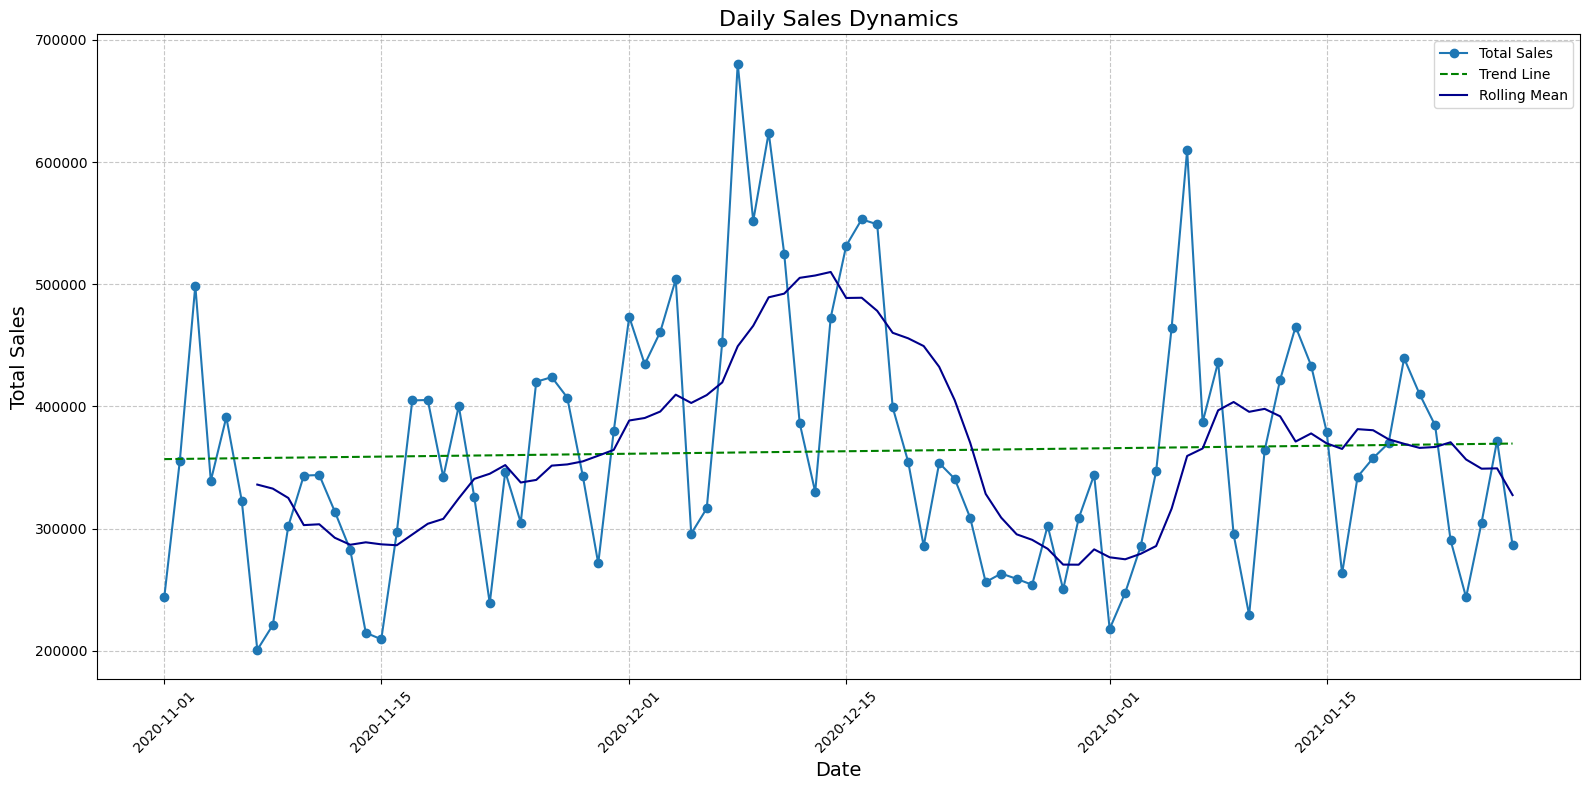

In [ ]:
# загальні продажі на кожну дату,
sales_by_day = df.groupby('date')['price'].sum().reset_index()
sales_by_day['7_days_avg'] = sales_by_day['price'].rolling(window=7).mean()

# візуалізація загальної динаміки продажів
plt.figure(figsize=(16, 8))

# розрахунок лінійної регресї
x = np.arange(len(sales_by_day['date']))
y = sales_by_day['price']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Лінійний графік
plt.plot(sales_by_day['date'], sales_by_day['price'], marker='o', linestyle='-', label='Total Sales')

# Ліня тренду
plt.plot(sales_by_day['date'], p(x), color='green', linestyle='--', label='Trend Line')

plt.plot(sales_by_day['date'], sales_by_day['7_days_avg'], color='darkblue', linestyle='-', label='Rolling Mean')

# Додавання підписів і легенди
plt.title('Daily Sales Dynamics', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


Спостерігається сезонність продажів. Найбільший пік припадає на грудень, що повязано із новорічними святами. В цілому продажі мають незначний тренд до зростання.

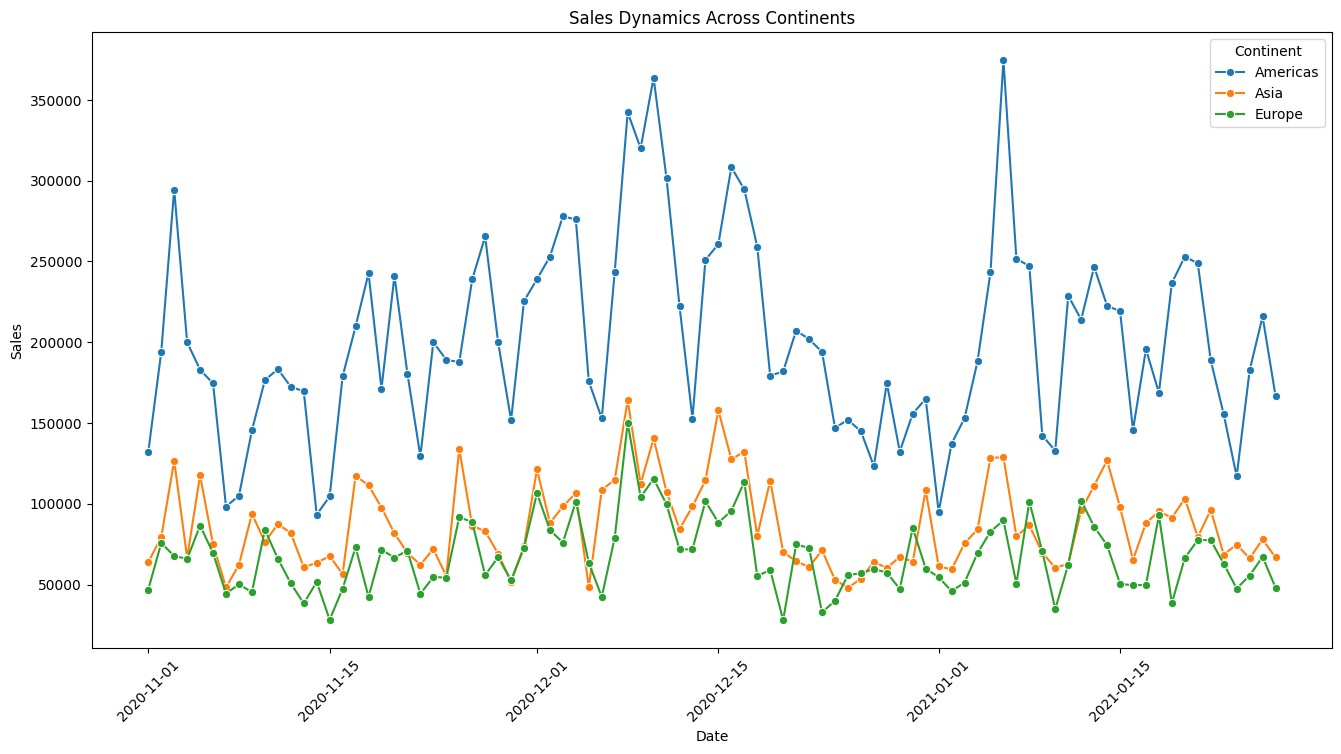

In [ ]:
# динаміка продажів в Америці, Азії та Європі
sales_by_continents = (df[df["continent"].isin(["Americas", "Asia", "Europe"])].groupby(['date', 'continent'])['price'].sum().sort_values(ascending=False).reset_index())

# візуалізація загальної динаміки продажів в Америці, Азії та Європі
plt.figure(figsize=(16, 8))
sns.lineplot(data=sales_by_continents, x="date", y="price", hue="continent", marker="o")

# додавання підписів і легенди
plt.title("Sales Dynamics Across Continents")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Continent")

plt.show()

Сезонність продажів за континентами відповідає загальному тренду. Найбільші продажі спостерігаються в Америках. Продажі в Європі та Азії майже на одному рівні.

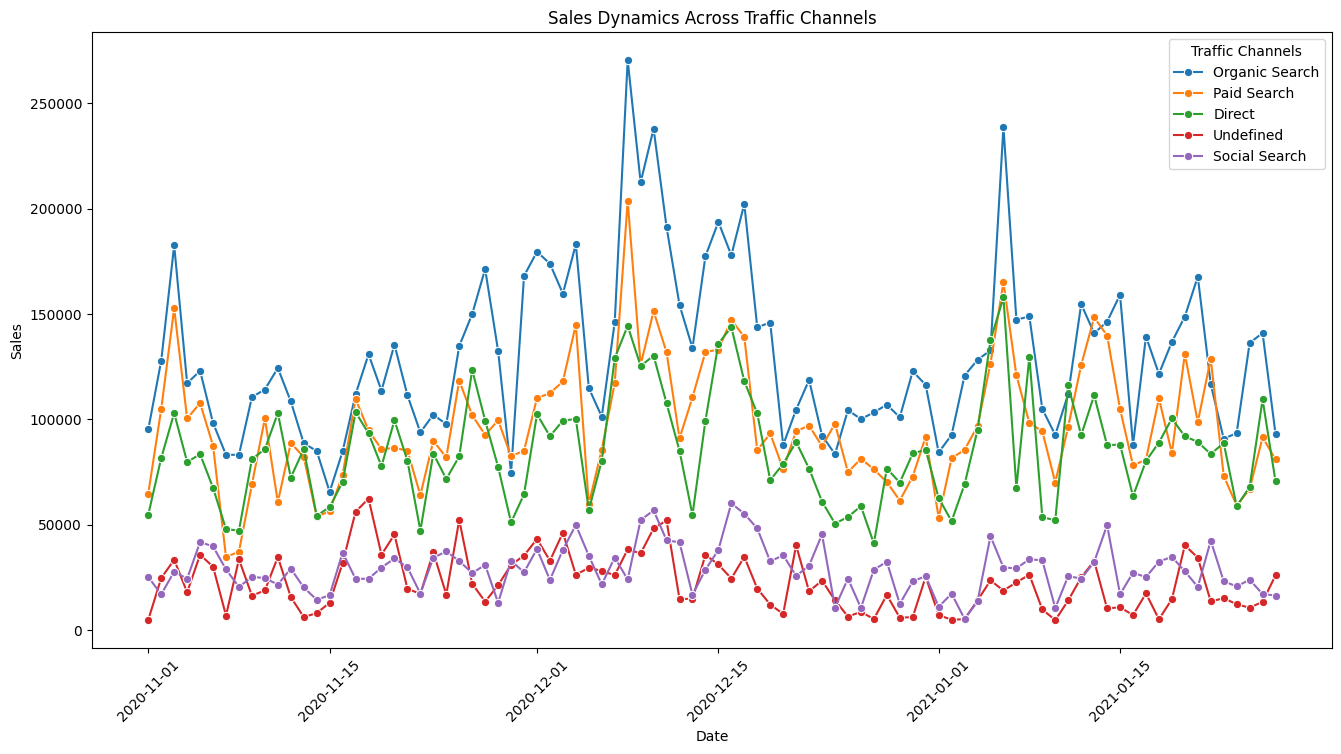

In [ ]:
# динаміка продажів у розрізі каналів трафіку
sales_by_continents = (df.groupby(['date', 'traffic_channel'])['price'].sum().sort_values(ascending=False).reset_index())

# візуалізація загальної динаміки продажів в Америці, Азії та Європі
plt.figure(figsize=(16, 8))
sns.lineplot(data=sales_by_continents, x="date", y="price", hue="traffic_channel", marker="o")

# додавання підписів і легенди
plt.title("Sales Dynamics Across Traffic Channels")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Traffic Channels")

plt.show()

За джерелами трафіку найбільші продажі на Organic, Paid Search та Direct.


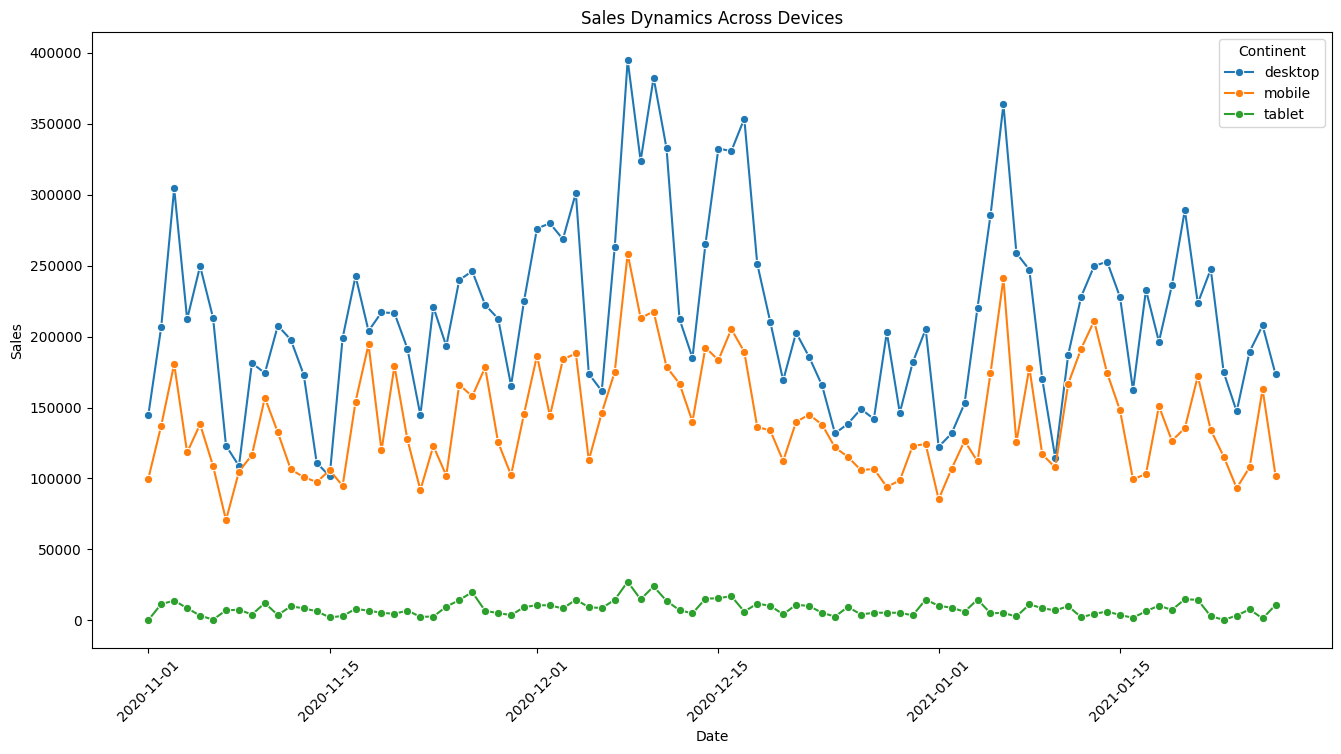

In [ ]:
# динаміка продажів у розрізі типів девайсів
sales_by_continents = (df.groupby(['date', 'device'])['price'].sum().sort_values(ascending=False).reset_index())

# візуалізація загальної динаміки продажів в Америці, Азії та Європі
plt.figure(figsize=(16, 8))
sns.lineplot(data=sales_by_continents, x="date", y="price", hue="device", marker="o")

# додавання підписів і легенди
plt.title("Sales Dynamics Across Devices")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Continent")

plt.show()

Найбільші продажі припадають на декстоп версію девайсів, трохи менше на мобільну. Планшети майже не впливають на загальні продажі.

#Зведені таблиці

In [ ]:
df.head()

,date,session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_name,traffic_channel,account_id,is_unsubscribed,is_verified,product_category,product_name,price,short_description
0,2020-12-24,5726438444,(not set),(not set),desktop,Chrome,Chrome,Web,None,(referral),Paid Search,<NA>,<NA>,<NA>,Cabinets & cupboards,LIXHULT,356.0,"Wall-mounted cabinet combination, 50x25x50 cm"
1,2020-12-13,5614986004,(not set),(not set),desktop,<Other>,<Other>,Web,en-ca,(organic),Organic Search,<NA>,<NA>,<NA>,Tables & desks,BEKANT,1325.0,"Desk, 140x60 cm"
2,2020-11-05,8542454082,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Chairs,ANTILOP,20.0,Cover
3,2020-12-16,1717992506,(not set),(not set),mobile,Safari,iPhone,Web,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Beds,SUNDVIK,849.0,"Ext bed frame with slatted bed base, 80x200 cm"
4,2021-01-16,8416141289,(not set),(not set),desktop,Chrome,Safari,Web,en-gb,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,ALGOT,130.0,"Wall upright/drying rack, 66x41x197 cm"


In [ ]:
# зведена таблиця, яка показує суму продажів у розрізі моделей девайсів
pivot_table = pd.pivot_table(df, values="price", columns="mobile_model_name", aggfunc="sum")
print(pivot_table)

mobile_model_name    <Other>     Chrome  ChromeBook      Edge   Firefox  \
price              6535330.8  8899523.9   1830458.7  697222.3  421066.9   

mobile_model_name   Pixel 3  Pixel 4 XL     Safari      iPad     iPhone  
price              109148.2    118287.7  6491062.1  448854.2  6420776.3  


In [ ]:
# зведена таблиця, яка показує яка кількість зареєстрованих користувачів створила акаунт та підписалася на розсилку
pivot_table = pd.pivot_table(df, values="account_id", index="is_unsubscribed", columns="is_verified", aggfunc="count")
print(pivot_table)

is_verified        0     1
is_unsubscribed           
0                748  1586
1                 44   403


In [ ]:
# зведена таблиця, яка показує кількість сесій у розрізі каналів трафіку та типів девайсів
pivot_table = pd.pivot_table(df, values="session_id", index="traffic_channel", columns="device", aggfunc="count")
print(pivot_table)

device           desktop  mobile  tablet
traffic_channel                         
Direct              4655    2985     160
Organic Search      7011    4655     255
Paid Search         5261    3574     207
Social Search       1594    1065      57
Undefined           1181     834      44


In [ ]:
# зведена таблиця, яка показує суму продажів у розрізі каналів трафіку та типів девайсів
pivot_table = pd.pivot_table(df, values="price", index="traffic_channel", columns="device", aggfunc="sum")
print(pivot_table)

device             desktop     mobile    tablet
traffic_channel                                
Direct           4472609.4  2875317.9  146996.1
Organic Search   6794107.8  4408875.1  230168.7
Paid Search      4976977.8  3330032.6  204039.0
Social Search    1447384.8  1006707.3   78013.6
Undefined        1172959.2   763292.9   64248.9


In [ ]:
# зведена таблиця, яка показує загальні продажі за категоріями товарів (топ-10 категорій) у топ-5 країн
pivot_table = pd.pivot_table(df, values="price", index="product_category", columns="country", aggfunc="sum")

# Вибираємо топ 10 категорій товарів за розміром продажів
top_categories = pivot_table.sum(axis=1).nlargest(10).index
pivot_table = pivot_table.loc[top_categories]

# Вибираємо топ 5 країн за розміром продажів
top_countries = pivot_table.sum(axis=0).nlargest(5).index
pivot_table = pivot_table[top_countries]

print(pivot_table)

country                           United States     India    Canada  \
product_category                                                      
Sofas & armchairs                     3707144.5  788430.0  692427.5   
Chairs                                2619773.8  544309.2  417740.8   
Beds                                  2213058.0  358319.5  354772.0   
Bookcases & shelving units            1567606.9  364507.4  278981.9   
Cabinets & cupboards                   994545.5  191888.0  181802.0   
Outdoor furniture                      929245.2  162289.4  185322.8   
Tables & desks                         777865.0  186157.5  132678.0   
Chests of drawers & drawer units       382388.0   73111.0   71952.0   
Bar furniture                          330805.0   57657.0   51724.0   
Children's furniture                   207575.0   39177.0   30264.0   

country                           United Kingdom    France  
product_category                                            
Sofas & armchairs        

#Статистичний аналіз взаємозв’язків

###Взаємозвязок між кількістю сесій та загальними продажами

In [ ]:
# кількість сесій та загальні продажі на кожну дату
pivot_table = pd.pivot_table(df, values=["session_id", "price"], index="date", aggfunc={"session_id": "count", "price": "sum"}).reset_index()
print(pivot_table)

         date     price  session_id
0  2020-11-01  244292.5         281
1  2020-11-02  355506.8         368
2  2020-11-03  498979.6         561
3  2020-11-04  339187.1         370
4  2020-11-05  391276.6         388
..        ...       ...         ...
83 2021-01-23  290605.5         313
84 2021-01-24  243818.4         296
85 2021-01-25  305089.3         370
86 2021-01-26  372057.3         385
87 2021-01-27  286340.7         299

[88 rows x 3 columns]


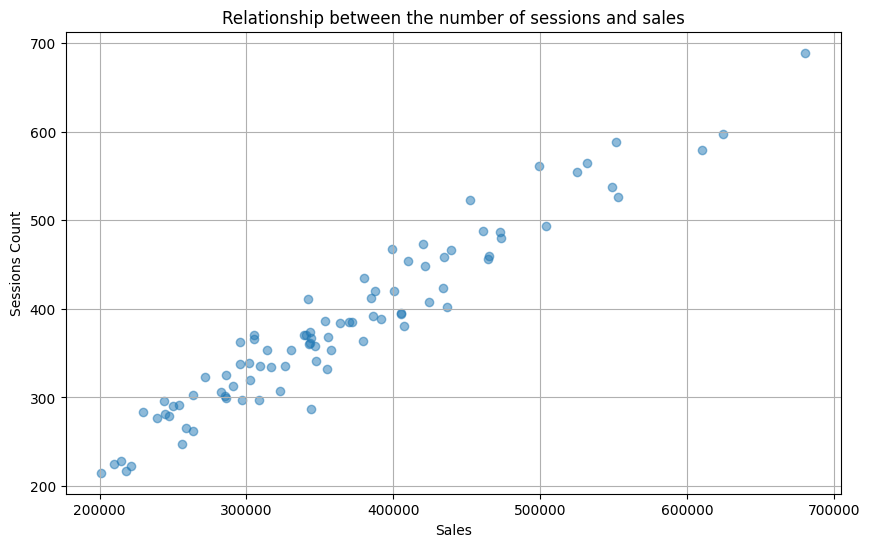

In [ ]:
# візуалізація для відjбраження взаємозв’язку між кількістю сесій та загальними продажами
plt.figure(figsize=(10, 6))
plt.scatter(pivot_table["price"], pivot_table["session_id"], alpha=0.5)

# додаємо заголовок та мітки
plt.xlabel("Sales")
plt.ylabel("Sessions Count")
plt.title("Relationship between the number of sessions and sales")
plt.grid(True)

# відображаємо графік
plt.show()

In [ ]:
# видаляю datetime-стовпці перед аналізом
pivot_table = pivot_table.select_dtypes(exclude=['datetime64[ns]'])

# проходжу по всіх стовпцях таблиці
for column in pivot_table.columns:
    # видаляю NaN значення
    clean_data = pivot_table[column].dropna()

    # виконую тест Д’Агостіно-Пірсона
    _, p_value_normaltest = normaltest(clean_data)

    # виводжу результат
    if p_value_normaltest < 0.05:
        print(f"❌ {column}: p-value = {p_value_normaltest:.5f} → розподіл НЕ нормальний")
    else:
        print(f"✅ {column}: p-value = {p_value_normaltest:.5f} → розподіл нормальний")


❌ price: p-value = 0.00716 → розподіл НЕ нормальний
❌ session_id: p-value = 0.02338 → розподіл НЕ нормальний


Тести показали, що розподіли не є нормальними, таким чином для аналізу кореляції використовиватиму рангову кореляцію Спірмена

In [ ]:
# обчислюю кореляцію Спірмена
correlation, p_value = spearmanr(pivot_table['price'], pivot_table['session_id'])

# виводжу тестову статистику та p-значення
print(f"Spearman correlation: {correlation:.5f}, p-value: {p_value:.5f}")

Spearman correlation: 0.95096, p-value: 0.00000


Дані тесту свідчать про сильну позитивну кореляцію між двома змінними. Результати є статистично значущими.

###Кореляція продажів на різних континентах

In [ ]:
# продажі на континентах
pivot_table = pd.pivot_table(df, values="price", index="date", columns="continent", aggfunc="sum")

# вибираю продажі на топ 3 континентах
top_continents = pivot_table.sum(axis=0).nlargest(3).index
pivot_table = pivot_table[top_continents].reset_index()

print(pivot_table)

continent       date  Americas      Asia   Europe
0         2020-11-01  132002.5   63823.0  46908.0
1         2020-11-02  193861.0   79370.0  75710.8
2         2020-11-03  294529.8  126737.8  67692.0
3         2020-11-04  200009.5   66602.0  65915.0
4         2020-11-05  182988.2  117608.4  86540.0
..               ...       ...       ...      ...
83        2021-01-23  155342.9   68543.0  62883.6
84        2021-01-24  116989.4   74801.2  47534.8
85        2021-01-25  182548.1   66215.2  55621.0
86        2021-01-26  215973.0   77995.2  67143.1
87        2021-01-27  166735.5   66783.1  48156.1

[88 rows x 4 columns]


In [ ]:
# видаляю datetime-стовпці перед аналізом
pivot_table = pivot_table.select_dtypes(exclude=['datetime64[ns]'])

# проходжу по всіх стовпцях таблиці
for column in pivot_table.columns:
    # видаляю NaN значення
    clean_data = pivot_table[column].dropna()

    # виконую тест Д’Агостіно-Пірсона
    _, p_value_normaltest = normaltest(clean_data)

    # виводжу результат
    if p_value_normaltest < 0.05:
        print(f"❌ {column}: p-value = {p_value_normaltest:.5f} → розподіл НЕ нормальний")
    else:
        print(f"✅ {column}: p-value = {p_value_normaltest:.5f} → розподіл нормальний")


✅ Americas: p-value = 0.05795 → розподіл нормальний
❌ Asia: p-value = 0.01791 → розподіл НЕ нормальний
❌ Europe: p-value = 0.00246 → розподіл НЕ нормальний


Оскільки в Америці нормальний розподіл, але ненормальний у Європі та Азії, потрібно використати метод кореляції Спірмена, бо хоча Америка нормальна, інші континенти ні.

In [ ]:
# список континентів
continents = ['Americas', 'Europe', 'Asia']

# створюю порожній словник для результатів
results = {}

# перебираю всі унікальні пари континентів
for i in range(len(continents)):
    for j in range(i + 1, len(continents)):
        x = pivot_table[continents[i]].dropna()
        y = pivot_table[continents[j]].dropna()

        # виконую кореляцію Спірмена
        spearman_corr, spearman_p = spearmanr(x, y)

        # зберігаю результати
        key = (continents[i], continents[j])
        results[key] = {'spearman_corr': spearman_corr, 'p_value': spearman_p}

# виводжу результати
for key, value in results.items():
    print(f"🔷 Кореляція Спірмена між {key[0]} та {key[1]}: r = {value['spearman_corr']:.5f}, p = {value['p_value']:.5f}")
    print("-" * 50)

🔷 Кореляція Спірмена між Americas та Europe: r = 0.62588, p = 0.00000
--------------------------------------------------
🔷 Кореляція Спірмена між Americas та Asia: r = 0.66854, p = 0.00000
--------------------------------------------------
🔷 Кореляція Спірмена між Europe та Asia: r = 0.60822, p = 0.00000
--------------------------------------------------


Значення кореляції > 0.6 вказує на помірно-сильну кореляцію.
Висока статистична значущість вказує на те, що результати не є випадковими.
Зміни в продажах на одному континенті схожі на зміни на інших, що може свідчити про глобальні тренди або взаємозалежність ринків.

###Кореляція продажів через різні канали трафіку

In [ ]:
# зведена таблиця про обсяг продажів за різними каналами трафіку
traffic_sales = pd.pivot_table(df, values="price", index="date", columns="traffic_channel", aggfunc="sum")
traffic_sales

traffic_channel,Direct,Organic Search,Paid Search,Social Search,Undefined
date,,,,,
2020-11-01,54669.5,95112.0,64688.0,25078.0,4745.0
2020-11-02,81561.5,127746.5,104780.8,16843.0,24575.0
2020-11-03,102909.5,182521.9,152641.3,27652.5,33254.4
2020-11-04,79683.6,117067.1,100332.0,24257.4,17847.0
2020-11-05,83367.6,122938.4,107648.0,41693.2,35629.4
...,...,...,...,...,...
2021-01-23,88714.4,90686.0,73075.1,23095.0,15035.0
2021-01-24,58644.2,93413.6,59018.0,20596.1,12146.5
2021-01-25,67844.0,136178.6,66775.7,23809.0,10482.0


In [ ]:
# видаляю datetime стовпці перед аналізом
traffic_sales = traffic_sales.select_dtypes(exclude=['datetime64[ns]'])

# проходжу по всіх стовпцях таблиці
for column in traffic_sales.columns:
  # видаляю NaN значення
    clean_data = traffic_sales[column].dropna()

    # виконую тест д'агостіно-пірсона для перевірки нормальності розподілу
    _, p_value_normaltest = normaltest(traffic_sales[column])

    # виводжу p-значення для кожного стовпця
    if p_value_normaltest < 0.05:
        print(f"❌ {column}: p-value = {p_value_normaltest:.5f} → розподіл НЕ нормальний")
    else:
        print(f"✅ {column}: p-value = {p_value_normaltest:.5f} → розподіл нормальний")

✅ Direct: p-value = 0.06084 → розподіл нормальний
❌ Organic Search: p-value = 0.00008 → розподіл НЕ нормальний
❌ Paid Search: p-value = 0.00346 → розподіл НЕ нормальний
✅ Social Search: p-value = 0.11442 → розподіл нормальний
❌ Undefined: p-value = 0.03995 → розподіл НЕ нормальний


In [ ]:
# створюю порожній словник для збереження результатів
results = {}

# отримую категорії трафіку з датафрейм
channels = traffic_sales.columns

# нормальні та ненормальні канали (вказані за результатами тесту)
normal_channels = {'Direct', 'Social Search'}
non_normal_channels = {'Organic Search', 'Paid Search', 'Undefined'}

# перебираю всі унікальні пари каналів
for i in range(len(channels)):
    for j in range(i + 1, len(channels)):
        x = traffic_sales[channels[i]].dropna()
        y = traffic_sales[channels[j]].dropna()

        # визначаю метод кореляції та відповідний символ
        if channels[i] in normal_channels and channels[j] in normal_channels:
            correlation, p_value = pearsonr(x, y)  # Пірсон для нормадбних даних
            method = "Пірсона"
            symbol = "🔶"
        else:
            correlation, p_value = spearmanr(x, y)  # Спірмена для ненормального розподіду
            method = "Спірмена"
            symbol = "🔷"

        # зберігаю результати
        key = (channels[i], channels[j])
        results[key] = {'correlation': correlation, 'p_value': p_value, 'method': method, 'symbol': symbol}

# виводжу результати
# створюю заголовок
print("📊 Кореляційний аналіз між каналами трафіку\n")

# яормую DataFrame для табличного відображення
df_results = pd.DataFrame([
    {
        "🔗 Канал 1": key[0],
        "🔗 Канал 2": key[1],
        "Метод": f"{value['symbol']} {value['method']}",
        "Коеф. кореляції (r)": f"{value['correlation']:.5f}",
        "p-value": f"{value['p_value']:.5f}"
    }
    for key, value in results.items()
])

# виводжу таблицю
print(df_results.to_string(index=False))

📊 Кореляційний аналіз між каналами трафіку

     🔗 Канал 1      🔗 Канал 2      Метод Коеф. кореляції (r) p-value
        Direct Organic Search 🔷 Спірмена             0.74825 0.00000
        Direct    Paid Search 🔷 Спірмена             0.69078 0.00000
        Direct  Social Search  🔶 Пірсона             0.46190 0.00001
        Direct      Undefined 🔷 Спірмена             0.49375 0.00000
Organic Search    Paid Search 🔷 Спірмена             0.76392 0.00000
Organic Search  Social Search 🔷 Спірмена             0.38477 0.00021
Organic Search      Undefined 🔷 Спірмена             0.45691 0.00001
   Paid Search  Social Search 🔷 Спірмена             0.42040 0.00005
   Paid Search      Undefined 🔷 Спірмена             0.49325 0.00000
 Social Search      Undefined 🔷 Спірмена             0.38590 0.00020


Сильна кореляція між органічним і платним пошуком свідчить про те, що збільшення органічного трафіку часто супроводжується зростанням платного трафіку. Можливо, це пов’язано з ефективними рекламними кампаніями, які також покращують органічну видимість.

Direct-трафік корелює з Organic Search та Paid Search.
Це може означати, що користувачі, які знаходять сайт через пошук (органічний чи платний), надалі повертаються напряму.

Social Search не має сильної кореляції з іншими каналами. Це означає, що трафік із соцмереж є менш передбачуваним і менш пов'язаним з іншими джерелами.

###Кореляція продажів продажі за топ-5 категоріями товарів

In [ ]:
# зведена таблиця про обсяг продажів за категоріями
categories = pd.pivot_table(df, values="price", index="date", columns="product_category", aggfunc="sum")
categories

product_category,Bar furniture,Beds,Bookcases & shelving units,Cabinets & cupboards,Café furniture,Chairs,Chests of drawers & drawer units,Children's furniture,Nursery furniture,Outdoor furniture,Room dividers,"Sideboards, buffets & console tables",Sofas & armchairs,Tables & desks
date,,,,,,,,,,,,,,
2020-11-01,11736.0,14041.0,36701.0,13591.5,915.0,46006.0,7314.0,5505.0,59.0,16270.0,2597.0,2840.0,75216.0,11501.0
2020-11-02,8083.0,79683.5,40979.0,21623.0,1400.0,58834.0,11347.0,4493.0,985.0,27768.8,495.0,NaN,79977.5,19838.0
2020-11-03,11182.0,66219.5,64360.1,33555.5,2264.0,61204.0,11773.0,9661.0,330.0,28980.0,2892.0,NaN,175594.0,30964.5
2020-11-04,12890.0,48939.0,35719.8,19266.0,395.0,44113.0,9744.0,6739.0,238.0,49034.8,NaN,1410.0,86861.5,23837.0
2020-11-05,10918.0,23449.0,40998.8,29235.0,1249.0,90388.4,6700.0,5129.0,2285.0,26179.4,220.0,445.0,137288.0,16792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-23,8316.0,37116.0,29862.7,26068.0,790.0,57493.0,7651.0,4549.0,2566.0,17569.8,NaN,1950.0,76898.0,19776.0
2021-01-24,5940.0,23294.0,25396.0,23664.5,NaN,54288.0,8713.0,6224.0,3505.0,18743.4,NaN,1650.0,57837.0,14563.5
2021-01-25,5634.0,47303.5,25919.6,33028.0,1864.0,51424.2,10348.0,6798.0,2125.0,10977.0,189.0,2095.0,84544.0,22840.0


In [ ]:
# створюю зведену таблицю
pivot_table = pd.pivot_table(df, values="price", index="date", columns="product_category", aggfunc="sum")

# вибираю топ-5 категорій продуктів за загальною сумою продажів
categories = pivot_table.sum(axis=0).nlargest(5).index

# створюю новий датафрейм, що містить тільки ці топ-5 категорій
top_categories = pivot_table[categories]

print(top_categories)

product_category  Sofas & armchairs   Chairs     Beds  \
date                                                    
2020-11-01                  75216.0  46006.0  14041.0   
2020-11-02                  79977.5  58834.0  79683.5   
2020-11-03                 175594.0  61204.0  66219.5   
2020-11-04                  86861.5  44113.0  48939.0   
2020-11-05                 137288.0  90388.4  23449.0   
...                             ...      ...      ...   
2021-01-23                  76898.0  57493.0  37116.0   
2021-01-24                  57837.0  54288.0  23294.0   
2021-01-25                  84544.0  51424.2  47303.5   
2021-01-26                  85431.0  96216.2  69894.5   
2021-01-27                  51354.0  48153.0  43080.0   

product_category  Bookcases & shelving units  Cabinets & cupboards  
date                                                                
2020-11-01                           36701.0               13591.5  
2020-11-02                           40979.0       

In [ ]:
# видаляю datetime стовпці перед аналізом
top_categories = top_categories.select_dtypes(exclude=['datetime64[ns]'])

# проходжу по всіх стовпцях таблиці
for column in top_categories.columns:
  # видаляю NaN значення
    clean_data = top_categories[column].dropna()

    # виконую тест д'агостіно-пірсона для перевірки нормальності розподілу
    _, p_value_normaltest = normaltest(top_categories[column])

    # виводжу p-значення для кожного стовпця
    if p_value_normaltest < 0.05:
        print(f"❌ {column}: p-value = {p_value_normaltest:.5f} → розподіл НЕ нормальний")
    else:
        print(f"✅ {column}: p-value = {p_value_normaltest:.5f} → розподіл нормальний")

❌ Sofas & armchairs: p-value = 0.01509 → розподіл НЕ нормальний
❌ Chairs: p-value = 0.00115 → розподіл НЕ нормальний
❌ Beds: p-value = 0.00002 → розподіл НЕ нормальний
❌ Bookcases & shelving units: p-value = 0.01526 → розподіл НЕ нормальний
❌ Cabinets & cupboards: p-value = 0.00065 → розподіл НЕ нормальний


In [ ]:
# створю порожній словник для збереження результатів
results = {}

# отримую список категорій
categories = top_categories.columns

# перебираю унікальні пари категорій
for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        x = top_categories[categories[i]]
        y = top_categories[categories[j]]

        # обчислюю кореляцію Спірмена
        correlation, p_value = spearmanr(x, y)

        # зберігаю результати у словник
        key = (categories[i], categories[j])
        results[key] = {"method": "Спірмена", "correlation": correlation, "p_value": p_value}

# виводжу результати
# заголовок
print("🔹 Кореляція Спірмена між категоріями:\n" + "-" * 50)

# формую DataFrame для табличного виводу
df_results = pd.DataFrame([{"Категорія 1": key[0], "Категорія 2": key[1], "r": value["correlation"], "p-value": value["p_value"]} for key, value in results.items()])

# виводжу таблицю
print(df_results.to_string(index=False))


🔹 Кореляція Спірмена між категоріями:
--------------------------------------------------
               Категорія 1                Категорія 2        r      p-value
         Sofas & armchairs                     Chairs 0.583319 2.462820e-09
         Sofas & armchairs                       Beds 0.521715 1.864368e-07
         Sofas & armchairs Bookcases & shelving units 0.625603 7.188991e-11
         Sofas & armchairs       Cabinets & cupboards 0.631204 4.322908e-11
                    Chairs                       Beds 0.534941 7.913416e-08
                    Chairs Bookcases & shelving units 0.636751 2.585438e-11
                    Chairs       Cabinets & cupboards 0.526822 1.344915e-07
                      Beds Bookcases & shelving units 0.542742 4.690832e-08
                      Beds       Cabinets & cupboards 0.440368 1.758783e-05
Bookcases & shelving units       Cabinets & cupboards 0.528706 1.190613e-07


Найвища кореляція між наступними категоріями:
- Chairs та Bookcases & shelving units (r = 0.637)
- Sofas & armchairs та Cabinets & cupboards (r = 0.631)
- Sofas & armchairs та Bookcases & shelving units (r = 0.626)

Висновок: Люди, які купують книжкові полиці та шафи, часто купують також стільці та дивани, що може свідчити про облаштування вітальні чи кабінету.

Найнижча кореляція між Beds та Cabinets & cupboards (r = 0.440).
Ліжка та шафи менш пов'язані між собою в купівельній поведінці, можливо, тому що їх купують для різних кімнат.

#Статистичний аналіз відмінностей між групами

###Продажі за кожну дату зареєстрованих та незареєстрованих користувачів

In [ ]:
pivot_table = pd.pivot_table(df, values="price", index="date",
                             columns=df["account_id"].notna().map({True: "registered", False: "unregistered"}),
                             aggfunc="sum")
print(pivot_table)

account_id  registered  unregistered
date                                
2020-11-01     21547.0      222745.5
2020-11-02     44956.8      310550.0
2020-11-03     29150.5      469829.1
2020-11-04     20982.2      318204.9
2020-11-05     25334.6      365942.0
...                ...           ...
2021-01-23     16117.0      274488.5
2021-01-24     20914.0      222904.4
2021-01-25     34163.8      270925.5
2021-01-26     27213.6      344843.7
2021-01-27     14613.6      271727.1

[88 rows x 2 columns]


In [ ]:
# видаляю NaN значення перед тестом
registered_prices = pivot_table["registered"].dropna()
unregistered_prices = pivot_table["unregistered"].dropna()

# виконую тест Д'Агостіно-Пірсона
_, p_value_registered = normaltest(registered_prices)
_, p_value_unregistered = normaltest(unregistered_prices)

# виводжу результати
print(f"Зареєстровані: p-value = {p_value_registered:.5f} → {'Нормальний' if p_value_registered > 0.05 else 'НЕ нормальний'} розподіл")
print(f"Незареєстровані: p-value = {p_value_unregistered:.5f} → {'Нормальний' if p_value_unregistered > 0.05 else 'НЕ нормальний'} розподіл")

Зареєстровані: p-value = 0.01093 → НЕ нормальний розподіл
Незареєстровані: p-value = 0.00557 → НЕ нормальний розподіл


Оскільки дані не мають нормального розподілу, для аналізу відмінностей між групами буде застосовано тест Манна-Вітні

In [ ]:
# иконуємо тест Манна-Вітні
u_stat, p_value = mannwhitneyu(pivot_table['registered'], pivot_table['unregistered'])
print(f"🔹 Манна-Вітні U: {u_stat}, p-value = {p_value:.5f}")

🔹 Манна-Вітні U: 0.0, p-value = 0.00000


Розподіл продажів зареєстрованих і незареєстрованих користувачів дуже різниться.
Оскільки U = 0,0, продажі однієї групи стабільно вищі або нижчі, ніж в іншої.
P-значення підтверджує, що ця різниця не є випадковістю.

###Кількість сесій за різними каналами трафіку

In [ ]:
traffic_sales = pd.pivot_table(df, values="price", index="date", columns="traffic_channel", aggfunc="sum")
traffic_sales

traffic_channel,Direct,Organic Search,Paid Search,Social Search,Undefined
date,,,,,
2020-11-01,54669.5,95112.0,64688.0,25078.0,4745.0
2020-11-02,81561.5,127746.5,104780.8,16843.0,24575.0
2020-11-03,102909.5,182521.9,152641.3,27652.5,33254.4
2020-11-04,79683.6,117067.1,100332.0,24257.4,17847.0
2020-11-05,83367.6,122938.4,107648.0,41693.2,35629.4
...,...,...,...,...,...
2021-01-23,88714.4,90686.0,73075.1,23095.0,15035.0
2021-01-24,58644.2,93413.6,59018.0,20596.1,12146.5
2021-01-25,67844.0,136178.6,66775.7,23809.0,10482.0


In [ ]:
# Видаляємо NaN, оскільки тести на нормальність не працюють з пропущеними значеннями
traffic_sales_clean = traffic_sales.dropna()

# Створюємо словник для збереження результатів
normality_results = {}

# Перебираємо кожен канал трафіку
for channel in traffic_sales_clean.columns:
    stat, p_value = normaltest(traffic_sales_clean[channel])

    # Зберігаємо результати у словник
    normality_results[channel] = p_value

# Виводимо результати
for channel, p_value in normality_results.items():
    if p_value < 0.05:
        print(f"❌ {channel}: p-value = {p_value:.5f} → розподіл НЕ нормальний")
    else:
        print(f"✅ {channel}: p-value = {p_value:.5f} → розподіл нормальний")


✅ Direct: p-value = 0.06084 → розподіл нормальний
❌ Organic Search: p-value = 0.00008 → розподіл НЕ нормальний
❌ Paid Search: p-value = 0.00346 → розподіл НЕ нормальний
✅ Social Search: p-value = 0.11442 → розподіл нормальний
❌ Undefined: p-value = 0.03995 → розподіл НЕ нормальний


Оскільки не всі групи мають нормальний розподіл, аналіз буде проводитися за доромогою тесту

In [ ]:
# Створюємо список груп (видаляємо NaN)
groups = [traffic_sales[channel].dropna() for channel in traffic_sales.columns]

# Виконуємо тест Крускала-Уолліса
stat, p_value = kruskal(*groups)

# Виводимо результати
print(f"📊 Тест Крускала-Уолліса: H-статистика = {stat:.5f}, p-value = {p_value:.5f}")

# Інтерпретація результатів
if p_value < 0.05:
    print("📌 Є статистично значущі відмінності між каналами трафіку!")
else:
    print("✅ Немає статистично значущих відмінностей між каналами.")



📊 Тест Крускала-Уолліса: H-статистика = 338.45904, p-value = 0.00000
📌 Є статистично значущі відмінності між каналами трафіку!


Тест Крускала-Уолліса виявив статистично значущі відмінності між групами.
Це означає, що розподіл продажів між каналами трафіку відрізняється.

###Доля сесій з органічним трафіком у Європі та Америці

In [ ]:
# Кількість сесій з органічним трафіком
organic_europe = df[(df['continent'] == 'Europe') & (df['traffic_channel'] == 'Organic Search')]['session_id'].nunique()
organic_americas = df[(df['continent'] == 'Americas') & (df['traffic_channel'] == 'Organic Search')]['session_id'].nunique()

# Загальна кількість сесій у Європі та Америці
total_europe = df[df['continent'] == 'Europe']['session_id'].nunique()
total_americas = df[df['continent'] == 'Americas']['session_id'].nunique()

# Частки органічного трафіку
p1 = organic_europe / total_europe
p2 = organic_americas / total_americas

# Виконуємо Z-тест для двох пропорцій
count = [organic_europe, organic_americas]
nobs = [total_europe, total_americas]
z_stat, p_value = sm.stats.proportions_ztest(count, nobs)

print(f"📊 Z-тест: Z-статистика = {z_stat:.3f}, p-value = {p_value:.5f}")

# Інтерпретація результату
if p_value < 0.05:
    print("📌 Є статистично значуща відмінність між частками органічного трафіку в Європі та Америці!")
else:
    print("✅ Немає статистично значущих відмінностей між частками органічного трафіку в Європі та Америці.")


📊 Z-тест: Z-статистика = 0.739, p-value = 0.45999
✅ Немає статистично значущих відмінностей між частками органічного трафіку в Європі та Америці.


Органічний трафік у Європі та Америці розподілений приблизно однаково.

# 📊 Загальний висновок

Аналіз даних про онлайн-продажі за період з **01.11.2020 до 27.01.2021** дозволяє зробити низку важливих висновків щодо поведінки покупців, ефективності каналів трафіку, сезонності, а також взаємозв’язку між різними категоріями товарів і аудиторіями.

---

## 🌍 Географія та демографія

- Найбільші продажі фіксуються на наступних континентах: **Америки, Азія, Європа**
- Топ країни за замовленнями: **США, Індія, Канада, Британія, Франція**
- Найбільше зареєстрованих користувачів: **Америка, Індія, Канада**
- Найвищий % підписників: **Франція, Німеччина**
- Найнижчий % підписників: **Британія, Канада**
- Підписка на розсилку популярна в Америці, Індії та Канаді; найвищий відсоток підписників – у Франції та Німеччині

---

## 📦 Продажі та категорії

- Топ-10 категорій товарів **збігаються** в загальному та в Америці, що свідчить про універсальність попиту
- **Сильна кореляція** між:
  - Стільці ↔ Полиці
  - Дивани ↔ Шафи
  - Книжкові полиці ↔ Кабінети
- Висновок: покупки меблів часто комплектуються для облаштування **вітальні або кабінету**

---

## 🖥️ Пристрої та браузери

- Продажі з:
  - **Десктопів — 59%**
  - **Мобільних — 38.7%**
- Топ-пристрої/браузери: **Chrome, Safari, iPhone**

---

## 🌐 Трафік

- Основні джерела продажів:
  - **Organic Search — 35.76%**
  - **Paid Search — 26.62%**
  - **Direct — 23.44%**
- Сильна **кореляція між каналами** пошуку та direct-трафіком вказує на можливу повторну взаємодію з брендом після першого візиту
- **Social** — не показує зв’язку з іншими каналами — трафік із соцмереж менш стабільний

---

## 📈 Сезонність і тренди

- Пік продажів у **грудні** — ефект свят
- Загалом спостерігається помірний **тренд до зростання**
- Сезонність **схожа** між континетами, з найвищими обсягами в Америках

---

## 📊 Кореляції та статистика

- **Сильна позитивна кореляція** (Спірмен) між:
  - Кількістю сесій ↔ Продажами
  - Продажами в різних регіонах (континенти)
- Взаємозалежність між континентами свідчить про **глобальні ринкові тренди**
- Продажі **зареєстрованих користувачів** статистично **вищі** (U = 0.0)
- **Z-тест** не виявив суттєвих відмінностей між часткою органічного трафіку в Європі та Америці

---

## ✅ Рекомендації

- Розвивати **органічний і платний пошук** як основні канали залучення
- Пріоритет — **десктопна версія** сайту як основне джерело продажів
- Стимулювати **реєстрацію та підписку** — зареєстровані користувачі забезпечують більші доходи
- Враховувати **сезонність** у маркетинговому плануванні
- Використовувати кореляції між категоріями для **крос-продажів** (наприклад, меблеві комплекти)